# 观察数据

In [ ]:
import numpy as np
data = np.loadtxt('ex1data1.txt',delimiter = ',')

X = data[:, :1]
y = data[:, 1:]
m = len(y)

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline


In [63]:
def plotData(x, y):
    fig, ax = plt.subplots()
    ax.scatter(x,y,c='r',marker='x')
    ax.set_xlabel('Population of City in 10,000s')
    ax.set_ylabel('Profit in $10,000s')
    ax.set_title('Predicted Profit vs. Population Size')
    #plt.show()
   

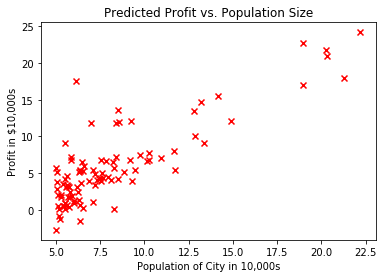

In [64]:
# Plot Data
# Note: You have to complete the code in plotData
plotData(X,y)

# 损失函数和梯度

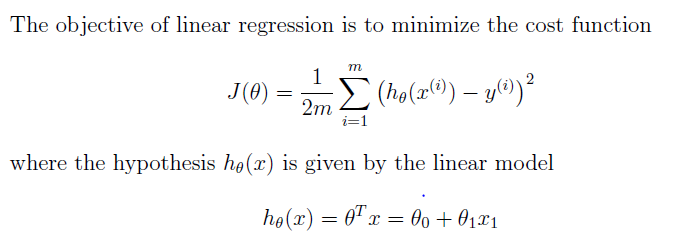

In [65]:
# =================== Part 3: Cost and Gradient descent ===================
X = np.column_stack((np.ones((m, 1)), X)) # Add a column of ones to x

In [66]:
theta = np.zeros((2, 1)) #initialize fitting parameters
theta # 2*1

array([[ 0.],
       [ 0.]])

In [67]:
#Some gradient descent settings
iterations = 1500;
alpha = 0.01;

In [68]:
def computeCost(X, y, theta):
    #COMPUTECOST Compute cost for linear regression
    #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y

    # Initialize some useful values
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    h_theta = np.dot(X,theta) #X:m rows, n+1 column, theta:n+1 rows, 1 column
    J = 0.5*np.sum(np.square(h_theta-y))/m
    return J


In [69]:
theta

array([[ 0.],
       [ 0.]])

In [70]:
print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(X, y, theta);

print('With theta = [0 ; 0]\nCost computed = %f\n'%J);
print('Expected cost value (approx) 32.07\n');

# further testing of the cost function
J = computeCost(X, y, np.array([[-1],[2]]));
print('\nWith theta = [-1 ; 2]\nCost computed = %f\n'%J);
print('Expected cost value (approx) 54.24\n');


Testing the cost function ...

With theta = [0 ; 0]
Cost computed = 32.072734

Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 54.242455

Expected cost value (approx) 54.24



In [71]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    #GRADIENTDESCENT Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1));
    
    #theta_temp = np.zeros((X.shape[1],1))
    for iter in range(num_iters):
        #print ("the %dth iteration...."%iter)
        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCost) and gradient here.
        #
        '''# why result using the loop doesn't match?
        for j in range(X.shape[1]):
            theta_temp[j]= theta[j] - alpha * np.sum(np.dot((np.dot(X,theta) - y).T,X))/ m
            print("theta[%d]: %s"%(j,theta_temp[j]))

        theta = theta_temp
        '''
        
        theta = theta - alpha * np.dot(X.T,(np.dot(X,theta)-y))/ m
        #print("theta: %s"%theta)
        # ============================================================

        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta);
        #print("J_history[%d]: %s"%(iter,J_history[iter]))
        
    return theta, J_history

In [72]:
theta= np.zeros((2,1))
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta, J = gradientDescent(X, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n');
print(theta);
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');


Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




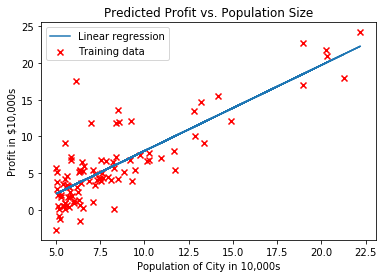

In [73]:
#plt.scatter(X[:,1],y, color = 'r', marker = 'x' )
plotData(X[:,1],y)

# Plot the linear fit
plt.plot(X[:,1], np.dot(X,theta), '-')
#plt.legend(labels = ['Training data', 'Linear regression'])
plt.legend(labels = ['Linear regression','Training data' ]) # how do I know which data series correspond to which label?


In [32]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5],theta);
print('For population = 35,000, we predict a profit of %f\n'%(predict1.flat[0]*10000));#注意要在打印的值外面加括号，否则会输出flat值10000遍
predict2 = np.dot([1, 7],theta);
print('For population = 70,000, we predict a profit of %f\n'%(predict2.flat[0]*10000));

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129



# 可视化损失函数和梯度

In [33]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

Visualizing J(theta_0, theta_1) ...



In [34]:
# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)));

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]]);
        J_vals[i,j] = computeCost(X, y, t);
    

Text(0.5,0,' J ')

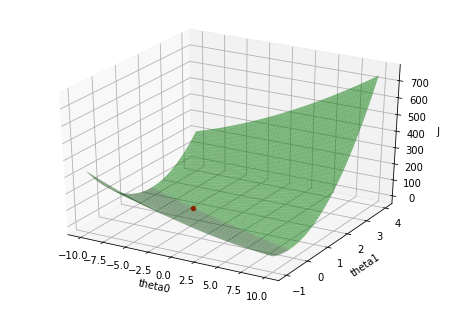

In [35]:
import mpl_toolkits.mplot3d.axes3d as p3
#https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
xzim, yzim = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.scatter(theta[0], theta[1], computeCost(X, y, theta), color='r')
ax.plot_surface(xzim, yzim, J_vals.T, color='g', alpha=.5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel(' J ')


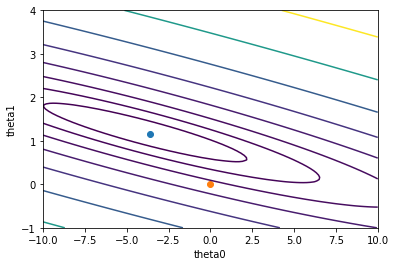

In [36]:
# Contour plot

plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour( theta0_vals, theta1_vals,  J_vals.T, np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')

plt.scatter(theta.flat[0], theta.flat[1])
plt.scatter(0, 0)


# 多变量线性回归

In [74]:
## Machine Learning Online Class
#  Exercise 1: Linear regression with multiple variables
#
#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear regression exercise. 
#
#  You will need to complete the following functions in this 
#  exericse:
#
#     warmUpExercise.m
#     plotData.m
#     gradientDescent.m
#     computeCost.m
#     gradientDescentMulti.m
#     computeCostMulti.m
#     featureNormalize.m
#     normalEqn.m
#
#  For this part of the exercise, you will need to change some
#  parts of the code below for various experiments (e.g., changing
#  learning rates).
#

import numpy as np


## ================ Part 1: Feature Normalization ================

print('Loading data ...\n');

## Load Data
data = np.loadtxt('ex1data2.txt',delimiter=',');
X = data[:, 0:2];
y = data[:, 2:];
m = len(y);

Loading data ...



In [75]:
# Print out some data points
#fprintf('First 10 examples from the dataset: \n');
#fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

# 如何实现上面MATLAB代码这样的输出？


In [76]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    # You need to set these values correctly
    X_norm = X;
    mu = np.zeros((1, len(X)));
    sigma = np.zeros((1, len(X)));

    # ====================== YOUR CODE HERE ======================
    # Instructions: First, for each feature dimension, compute the mean
    #               of the feature and subtract it from the dataset,
    #               storing the mean value in mu. Next, compute the 
    #               standard deviation of each feature and divide
    #               each feature by it's standard deviation, storing
    #               the standard deviation in sigma. 
    #
    #               Note that X is a matrix where each column is a 
    #               feature and each row is an example. You need 
    #               to perform the normalization separately for 
    #               each feature. 
    #
    # Hint: You might find the 'mean' and 'std' functions useful.
    # 
    mu = X.mean(axis=0).reshape(1,X.shape[1])
    sigma = np.std(X,axis=0)
    X = (X - mu)/sigma
                     
    return X, mu, sigma

In [77]:
# Scale features and set them to zero mean
print('Normalizing Features ...\n');

X, mu, sigma = featureNormalize(X);

Normalizing Features ...



In [78]:
# Add intercept term to X
X = np.column_stack((np.ones((m, 1)),X))
#X

# 梯度下降

损失函数的向量表示
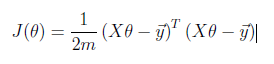

In [79]:
def computeCostMulti(X, y, theta):
    #COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
    #   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
    #   parameter for linear regression to fit the data points in X and y
    
    # Initialize some useful values
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    J = 0.5 *np.dot((np.dot(X,theta) - y).T,(np.dot(X,theta) - y)) / m

    # =========================================================================
    return J


In [80]:
def gradientDescent_multi(X, y, theta, alpha, num_iters):
    # actually the gradientDescent function implemented above alrady supports multi-variable linear regression
    # here use the vectorized form of cost function
    #GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(num_iters):

        # ====================== YOUR CODE HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCostMulti) and gradient here.
        #
        theta = theta - alpha * (np.dot(X.T,(np.dot(X,theta)-y)))/ m 
        #矩阵点乘本身就包含了求和

        # Save the cost J in every iteration    
        J_history[iter]= computeCostMulti(X, y, theta)
        # 是否需要判断收敛？
        
    return theta, J_history

In [81]:
## ================ Part 2: Gradient Descent ================

# ====================== YOUR CODE HERE ======================
# Instructions: We have provided you with the following starter
#               code that runs gradient descent with a particular
#               learning rate (alpha). 
#
#               Your task is to first make sure that your functions - 
#               computeCost and gradientDescent already work with 
#               this starter code and support multiple variables.
#
#               After that, try running gradient descent with 
#               different values of alpha and see which one gives
#               you the best result.
#
#               Finally, you should complete the code at the end
#               to predict the price of a 1650 sq-ft, 3 br house.
#
# Hint: By using the 'hold on' command, you can plot multiple
#       graphs on the same figure.
#
# Hint: At prediction, make sure you do the same feature normalization.
#

print('Running gradient descent ...\n');

# Choose some alpha value
alpha = 0.01;
num_iters = 400;

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))
theta, J_history = gradientDescent_multi(X, y, theta, alpha, num_iters);

Running gradient descent ...



Theta computed from gradient descent: 

[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]


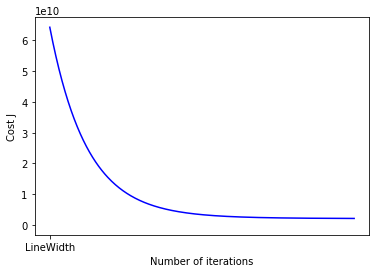

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the convergence graph
fig = plt.figure()
plt.plot(range(len(J_history)), J_history, '-b', 'LineWidth', 2);
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
# 怎样添加X轴刻度线？

# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);

In [83]:
theta = np.zeros((3, 1))
theta1, J1 = gradientDescent_multi(X, y, theta, 0.03, num_iters);
theta2, J2 = gradientDescent_multi(X, y, theta, 0.1, num_iters);

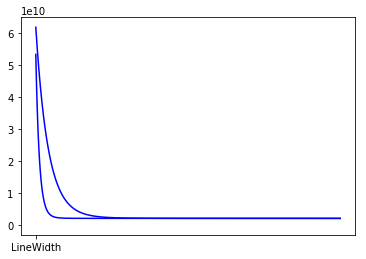

In [84]:
plt.plot(range(len(J_history)), J1, '-b', 'LineWidth', 2);
plt.plot(range(len(J_history)), J2, '-b', 'LineWidth', 2);
# 添加图例？

In [48]:
# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
# 预测之前切记要做同样的normalization!!!
area = ( 1650 - mu.flat[0])/sigma.flat[0]
br_num = (3 - mu.flat[1])/sigma.flat[1]
price = np.dot([1,area,br_num],theta2).flat[0] # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent:\n $%f\n'%price)

Predicted price of a 1650 sq-ft, 3 br house using gradient descent:
 $293081.464529



# 正规方程

In [50]:
## ================ Part 3: Normal Equations ================

print('Solving with normal equations...\n');

# ====================== YOUR CODE HERE ======================
# Instructions: The following code computes the closed form 
#               solution for linear regression using the normal
#               equations. You should complete the code in 
#               normalEqn.m
#
#               After doing so, you should complete this code 
#               to predict the price of a 1650 sq-ft, 3 br house.
#

## Load Data
data = np.loadtxt('ex1data2.txt', delimiter = ',');
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

Solving with normal equations...



In [51]:
# Add intercept term to X
X = np.column_stack((np.ones((m, 1)),X))

Normal Equation:
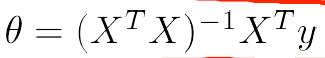

In [52]:
import numpy.linalg as lalg
def normalEqn(X, y):
    #NORMALEQN Computes the closed-form solution to linear regression 
    #   NORMALEQN(X,y) computes the closed-form solution to linear 
    #   regression using the normal equations.

    theta = np.zeros((X.shape[1], 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the code to compute the closed form solution
    #               to linear regression and put the result in theta.
    #

    # ---------------------- Sample Solution ----------------------
    theta = np.dot(lalg.pinv(np.dot(X.T,X)), np.dot(X.T, y)) #矩阵乘法符合结合律
    return theta

In [53]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

In [55]:
# Display normal equation's result
print('Theta computed from the normal equations: \n');
print(theta);

Theta computed from the normal equations: 

[ 89597.90954361    139.21067402  -8738.01911255]


In [56]:
np.dot([1,1650,3],theta).flat[0] # 预测， 不需要特征缩放
# 结果与使用梯度下降算法求得的theta进行预测的结果基本一致

293081.46433498873

梯度下降算法求得的theta由于X进行了特征缩放，因此与normal equation算得的theta不同